线性可分支持向量机

In [15]:
# cvxopt求解凸二次规划问题
from cvxopt import matrix, solvers
P = matrix([[1.0, 0.0],[0.0, 0.0]])
q = matrix([3.0, 4.0])
G = matrix([[-1.0, 0.0, -1.0, 2.0, 3.0], [0, -1.0, -3.0, 5.0, 4.0]])
h = matrix([0.0, 0.0, -15.0, 100.0, 80.0])
sol = solvers.qp(P, q, G, h) # 构建求解器
print(sol['x'], sol['primal objective'])

     pcost       dcost       gap    pres   dres
 0:  1.0780e+02 -7.6366e+02  9e+02  0e+00  4e+01
 1:  9.3245e+01  9.7637e+00  8e+01  1e-16  3e+00
 2:  6.7311e+01  3.2553e+01  3e+01  3e-18  1e+00
 3:  2.6071e+01  1.5068e+01  1e+01  9e-17  7e-01
 4:  3.7092e+01  2.3152e+01  1e+01  1e-16  4e-01
 5:  2.5352e+01  1.8652e+01  7e+00  3e-16  7e-17
 6:  2.0062e+01  1.9974e+01  9e-02  9e-17  7e-17
 7:  2.0001e+01  2.0000e+01  9e-04  6e-17  2e-16
 8:  2.0000e+01  2.0000e+01  9e-06  9e-17  4e-16
Optimal solution found.
[ 7.13e-07]
[ 5.00e+00]
 20.00000617311241


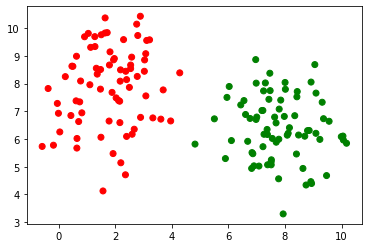

In [16]:
# 生成模拟二分类数据集
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets._samples_generator import make_blobs # 二分类数据生成模块
X, y = make_blobs(n_samples=150, n_features=2, centers=2, cluster_std=1.2, random_state=20)
y_ = y.copy()
y_[y_==0] = -1 # 将标签转换为1/-1
y_ = y_.astype(float)
X_train, X_test, y_train, y_test = train_test_split(X, y_, test_size=0.3, random_state=43)
colors = {0:'r', 1:'g'} # 设置颜色参数
plt.scatter(X[:, 0], X[:, 1], marker='o', c=pd.Series(y).map(colors))
plt.show()

线性可分支持向量机

In [17]:
# 硬间隔最大化策略
class Hard_Margin_SVM:
    # 线性可分支持向量机拟合方法
    def fit(self, X, y):
        m, n = X.shape # 样本数和特征数

        # 初始化二次规划相关变量
        self.P = matrix(np.identity(n + 1, dtype=np.float))
        self.q = matrix(np.zeros((n + 1, ), dtype=np.float))
        self.G = matrix(np.zeros((m, n + 1), dtype=np.float))
        self.h = -matrix(np.ones((m,), dtype=np.float))

        # 将数据转为变量
        self.P[0, 0] = 0
        for i in range(m):
            self.G[i, 0] = -y[i]
            self.G[i, 1:] = -X[i, :] * y[i]

        # 构建二次规划求解
        sol = solvers.qp(self.P, self.q, self.G, self.h)

        # 对权重和偏置寻优
        self.w = np.zeros(n,)
        self.b = sol['x'][0]
        for i in range(1, n + 1):
            self.w[i - 1] = sol['x'][i]
        return self.w, self.b
        
    # 定义模型预测函数
    def predict(self, X):
        return np.sign(np.dot(self.w, X.T) + self.b)

基于cvxopt的线性可分支持向量机训练数据

In [18]:
from sklearn.metrics import accuracy_score
hard_margin_svm = Hard_Margin_SVM()
hard_margin_svm.fit(X_train, y_train)
y_pred = hard_margin_svm.predict(X_test)
print(f'the accuracy_score is {accuracy_score(y_test, y_pred)}')

     pcost       dcost       gap    pres   dres
 0:  4.2508e-02  3.0223e+01  3e+02  2e+00  5e+02
 1:  3.3576e-01 -4.0513e+01  6e+01  4e-01  1e+02
 2:  6.0967e-01 -1.0698e+01  1e+01  8e-02  2e+01
 3:  6.8469e-01  3.5848e-01  3e-01  9e-04  3e-01
 4:  6.1613e-01  5.9832e-01  2e-02  5e-05  1e-02
 5:  6.1499e-01  6.1346e-01  2e-03  2e-06  6e-04
 6:  6.1484e-01  6.1483e-01  2e-05  2e-08  6e-06
 7:  6.1484e-01  6.1484e-01  2e-07  2e-10  6e-08
Optimal solution found.
the accuracy_score is 1.0


C:\Users\panda\AppData\Local\Temp\ipykernel_105664\3089817416.py:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self.P = matrix(np.identity(n + 1, dtype=np.float))
C:\Users\panda\AppData\Local\Temp\ipykernel_105664\3089817416.py:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self.q = matrix(np.zeros((n + 1, ), dtype=np.float))
C:\User

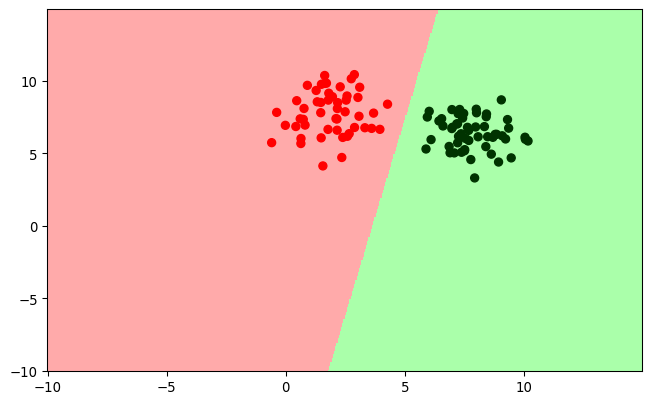

In [19]:
# 绘制线性可分支持向量机决策边界图
from matplotlib.colors import ListedColormap

def plot_classifer(model, X, y):
    # 超参数边界
    x_min = -10
    x_max = 15
    y_min = -10
    y_max = 15
    step = 0.05
    # meshgrid
    xx, yy = np.meshgrid(np.arange(x_min, x_max, step),
                        np.arange(y_min, y_max, step))
    # 模型预测
    #.ravel压平, .c_按列叠加, .r_按行叠加
    z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # 定义color map
    # ListedColormap 将数字映射到颜色或以一维颜色数组 (也称为colormap)进行颜色规格转换
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
    cmap_bold = ListedColormap(['#FF0000', '#003300'])
    z = z.reshape(xx.shape)

    plt.figure(figsize=(8, 5), dpi=96) # dpi像素
    plt.pcolormesh(xx, yy, z, cmap=cmap_light)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.show()

plot_classifer(hard_margin_svm, X_train, y_train)

基于sklearn的线性可分支持向量机实现测试

In [27]:
from sklearn.svm import LinearSVC
clf = LinearSVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

1.0


d:\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
